In [1]:
""" Bandstructure calculator 

This script allows the user to do bandstructure calculations

This script requires as input the lattice parameters information

    * alat: lattice constant
    * a1, a2, a3: lattice vectors (in terms of alat)

Also it requires prior Wannier90 post-processing from "helper.py" library
and the k-path from "k_path.npy"

It saves the array of bands to "bands.npy"
"""

import numpy as np

alat = 12.0616
a1 = np.array([   1.000000,   0.000000,   0.000000 ]) * alat
a2 = np.array([   0.000000,   0.540617,   0.000000 ]) * alat
a3 = np.array([   0.000000,   0.000000,   3.158529 ]) * alat

####################################################
#### no need to change anything below this line ####
####################################################

vol = np.absolute(np.dot(np.cross(a1,a2),a3));
b1 = 2 * np.pi * np.cross(a2,a3) / vol;
b2 = 2 * np.pi * np.cross(a3,a1) / vol;
b3 = 2 * np.pi * np.cross(a1,a2) / vol;

degen = np.load('degeneracy.npy')
disp = np.load('displacement.npy')
matrices = np.load('matrix.npy')
kpoints = np.load('k_path.npy')

nrpts, dim, dim = np.shape(matrices)
eigen = []

for kc in range(np.shape(kpoints)[1]):
    k1, k2, k3 = kpoints[:, kc]
    k = k1*b1 + k2*b2 + k3*b3
    ham = np.zeros((dim, dim), dtype = complex)
    
    for count in range(nrpts):
        d1, d2, d3 = disp[count, :]
        r = d1*a1 + d2*a2 + d3*a3
        matrix = matrices[count, :, :]
        ham += matrix * np.exp(1j * np.dot(k, r)) * degen[count]
        
    ham = (ham + ham.conj().T) / 2
    ek = np.real(np.linalg.eigvals(ham))
    eigen.append(ek)

np.save('bands', eigen)

In [26]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

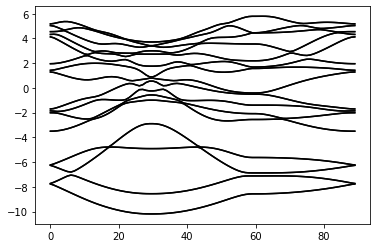

In [27]:
plt.plot(np.sort(eigen)-0.4828,'-k')
plt.show()


In [109]:
degen = np.load('degeneracy.npy')
disp = np.load('displacement.npy')
matrices = np.load('matrix.npy')
kpoints = np.load('k_path.npy')

In [112]:
nrpts, dim, dim = np.shape(matrices)
np.shape(kpoints)[1]

90

In [126]:
eigen = []
for kc in range(np.shape(kpoints)[1]):
    k1, k2, k3 = kpoints[:, kc]
    k = k1*b1 + k2*b2 + k3*b3
    ham = np.zeros((dim, dim), dtype = complex)
    
    for count in range(nrpts):
        d1, d2, d3 = disp[count, :]
        r = d1*a1 + d2*a2 + d3*a3
        matrix = matrices[count, :, :]
        ham += matrix * np.exp(1j * np.dot(k, r)) * degen[count]
        
    ham = (ham + ham.conj().T) / 2
    ek = np.real(np.linalg.eigvals(ham))
    eigen.append(ek)

np.save('bands', eigen)

In [127]:
np.shape(eigen)

(90, 32)

In [132]:
np.shape(ek)

(32,)

In [108]:
ek = np.real(np.linalg.eigvals(ham))
ek

array([ 1.91949362e-04,  1.91675000e-04, -1.42920132e-04, -1.39198159e-04,
       -1.16219645e-04, -1.15428543e-04,  1.22809310e-04,  1.21064788e-04,
        9.66917632e-05,  9.78043159e-05,  5.40717824e-05,  5.30100236e-05,
        4.30061849e-05,  4.38902301e-05, -3.30878199e-05, -3.17898833e-05,
        2.16235892e-05,  2.04605848e-05, -2.22595142e-05, -2.15057209e-05,
        9.85535370e-06,  9.18277943e-06, -1.22924775e-05, -1.13716393e-05,
       -8.65051062e-06, -9.30020608e-06,  3.89029604e-06,  3.02339235e-06,
       -2.51737067e-06, -1.91006088e-06, -2.48947437e-07,  6.91874482e-07])

In [107]:
np.shape(ek)

(32,)